## Catchment Hydrology, MSc course
### Lecture 2: Budyko water balance models
#### Wouter R. Berghuijs (w.r.berghuijs@vu.nl)

In this notebook you will use the Budyko water balance model to estimate and describe how the long-term average water balance of a catchment behaves under particular climate conditions. 

In [1]:
# Import some packages to run Python
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Potential evaporation

**Potential evaporation** is defined as the amount of evaporation that would
occur if a sufficient water source were available. Several formulas exist to estimate it.
We will use a very simple example that is only based on temperature (Eq. 2B4.2 of Dingman):
$$E_p = 1.2 \cdot 10^{10} \cdot \text{exp}(-4620/T)     \text{          (mm/y)}$$ 
where $T$ = mean temperature (K). 


Note that this is a highly simplified formula, and in the course ecohydrology you will discuss more physically based formula's such as Penman-Monteith. In reality, potential evaporation will depend on a wider range of factors such as wind speed, humiditity, and radiation. However, ignoring these, and solely using temperature can give a first-order estimate of potential evaporation.

**Aridity** (dimensionless) is defined as the ratio of long-term and long-term potential evaporation ($E_p$) precipitation:
$$Aridity = E_p / P$$
where $P$ is the multi-year mean **precipitation** (mm/y) and $E_p$ is the multi-year **potential
evaporation** (mm/y). Thus, if aridity is smaller than one, it means there is more rain than potential evaporation (think for example of the west coast of Norway as an example, because it is cold and and has a lot of rain). In contrast, high aridity values that are much larger than one reflect drier and/or warmer places (think of the Sahara desert as an example, because it has almost no rain, and is warm).




### Calculate potential evaporation
To get some feel for what typical long-term average values of potential evaporation are, we calculate potential evaporation based on Eq. 2B4.2 of Dingman (also shown above). You can calculate this for a temperature of your choice by sliding the bar below.

In [2]:
# Potential evaporation based on temperature

def pot_evap(Temperature):
    T = 272.15+Temperature # Convert to Kelvin
    E_p = 1.2*10**10 * math.exp(-4620/T) # Calculate potential evaporation
    print("when the annual mean temperature is " + str(Temperature) + ' (Celsius)') #print value
    print("potential evaporation is " + str(int(E_p)) + ' (mm/y)') #print outcome
    
widgets.interact(pot_evap,Temperature =(-10 , 30, 0.1))

interactive(children=(FloatSlider(value=10.0, description='Temperature', max=30.0, min=-10.0), Output()), _dom…

<function __main__.pot_evap(Temperature)>

### Estimate aridity
If we now also provide indicate how much precipitation there is in an particular area, we can estyimastye the aridity of a location.

In [3]:
# Provide rainfall

def aridity(Precipitation, Pot_Evap):
    AI = Pot_Evap/Precipitation # Calculate potential evaporation
    print("For P is " + str(int(Precipitation)) + ' (mm/y)' + 
          "and E_p is " + str(int(Pot_Evap)) + ' (mm/y):') #print outcome


    print("Aridity is " + str(float(AI)) + ' (dimensionless)') #print outcome
    
widgets.interact(aridity, Precipitation =(0 ,2000, 10),Pot_Evap=(0 ,2000, 10))

interactive(children=(IntSlider(value=1000, description='Precipitation', max=2000, step=10), IntSlider(value=1…

<function __main__.aridity(Precipitation, Pot_Evap)>

**Question 1: How much is the mean annual potential evaporation in the Netherlands, ?**

**Question 2: What is the aridity index of the Netherlands?**

**Question 3: How would both values change if temperature rises by 2 degrees Celsius? (and all other factors stay the same)**

## How much streamflow would one expect based on Budyko?
How much the mean annual streamflow of a catchment is, depends on many factors. However, as we have seen in today's class, most of the between-catchment differences in the long-term water balance is determined by climate aridity. Budyko [1974] describes this global relationship as: 
$$E/P =  [E_p/P  \text{  tanh}⁡(P/E_p )(1-\text{exp}(-E_p/P)) ]^{1/2}$$
where $P$ is mean annual precipitation, $E$ is mean annual evapotranspiration, and $E_p$ is mean potential evaporation.

The Budyko curve (i.e. Eq. above) captures roughly 90% of the between catchment differences in evaporative fractions (this differences in how much of P becomes E versus Q) across over a thousand European catchments [Budyko, 1951]. The evidence of a strong universal relationship between aridity and the evaporative fraction has grown since, as more recent data also tend to show a relatively strong relation between aridity versus evaporative fractions and runoff ratios for many more catchments globally [e.g. Zhang et al., 2001; Potter et al., 2005; Trancoso et al., 2016; Padrón et al., 2017; Gnann et al., 2019]. To illustrate how catchments tend to fall near the Budyko curve, I here show long-term water balances from 410 catchments of the US MOPEX dataset [Duan et al., 2006] (Fig. 1; Spearman $\rho$ = 0.83). The strong relationship between aridity and the evaporative fraction (and runoff ratio) forms the basis of nearly all studies that use the Budyko framework. 

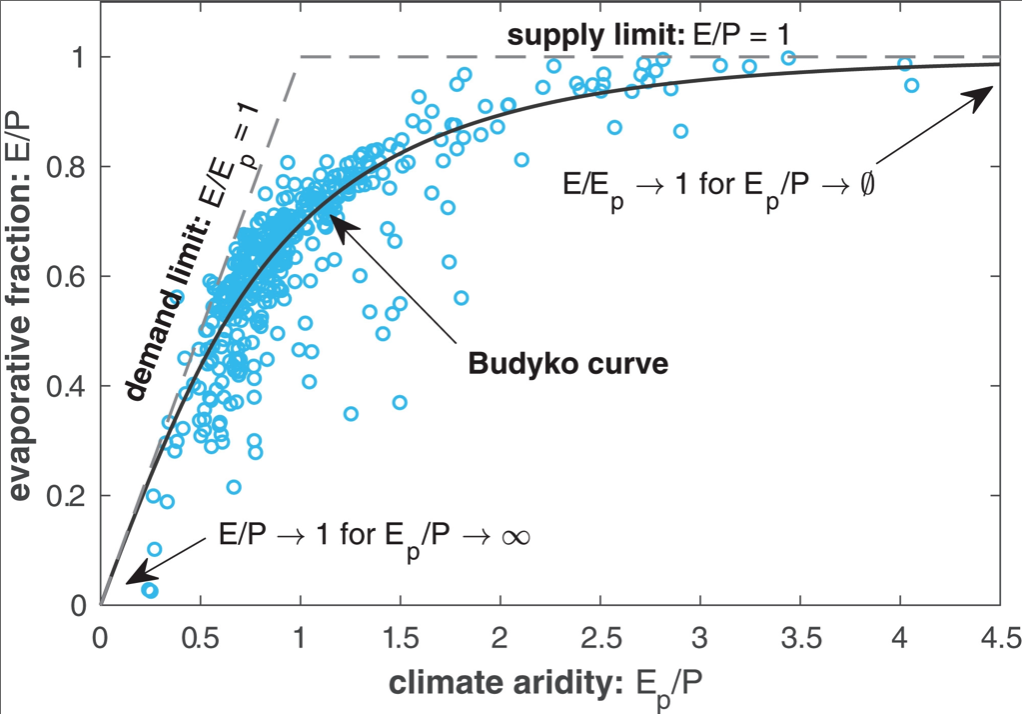

**Figure: Basics of the Budyko framework.** The x-axis contains the aridity index ($E_p/P$) and the y-axis the evaporative fraction ($E/P$), which often is approximated by one minus the runoff ratio ($E/P = 1-Q/P$) because storage changes are assumed to be negligible at multi-year timescales. Together, these two axes form the two-dimensional Budyko space. Catchments within the space should theoretically fall below the supply limit ($E/P = 1$) and the demand limit ($E/E_p = 1$), but tend to approach these limits under very arid or very wet conditions. Many catchments around the world fall around the Budyko curve (black solid line), including 410 US catchments which are indicated by blue markers (**Source figure**: Berghuijs et al. [2020])

**Question 4: Why does evaporation not exceed the demand and supply limits depicted in the figure above?**


## Estimated streamflow and evaporation based on the Budyko curve
Let's pick climate values (e.g., the values we filled in above) and use these to estimate how much streamflow (per unit area) we expect. You can do this by adjusting the aridity and the total precipitation 

In [4]:
# Use Budyko's equation, fill in the aridity to determine the evaporation fraction (E/P)
def Evap_fraction(AI, P):
    EP = ((AI *math.tanh(1/AI))*(1-math.exp(-AI)))**(0.5)
    # Write out this evaporative fraction
    print('For the chosen aridity (dimensionless) and precipitation (mm/y)')
    print("the fraction of P that becomes E is " + str(EP))

    # Write out runoff ratio (which is Q/P = 1/E/P)
    print("and the fraction of P that becomes Q is " + str(1-EP))

    # Multiply by P to get total flow rate in mm/y
    print("The annual flow rate is expected to be around " + str(int((1-EP)*P)) + " (mm/y)")

widgets.interact(Evap_fraction, AI  = (0 ,2.5, 0.1), P =(0 ,2000, 10))

interactive(children=(FloatSlider(value=1.2000000000000002, description='AI', max=2.5), IntSlider(value=1000, …

<function __main__.Evap_fraction(AI, P)>

**Question 5: On average, what fraction of precipitation becomes streamflow when aridity is one?**

**Question 6: How much higher and lower does this fraction become when a place becomes twice as arid, or twice as wet?**

## A generalized version of Budyko using Fuh's equation

The Budyko framework [Budyko, 1974] utilizes this prominent role of aridity and, in its parametric form (e.g., Fu [1981], and also known as Fu's quation), states that the mean-annual balance between E and Q can be expressed as a function of aridity and other factors:
$$F(\phi, \omega) = E/P = 1-Q/P = 1+\phi -(1+\phi^{\omega})^{1\omega} $$ 
where $F$ is an analytical equation describing the evaporative fraction ($E/P$) or runoff ratio ($Q/P$), $ϕ$ is aridity ($E_P/P$), and $\omega$ is a parameter ($\omega>1$) that accounts for all other factors that influence the mean-annual partitioning of precipitation (e.g., climate seasonality, soils, vegetation, and topography).

In [5]:
def Fuhs_model(omega):
    # Example of Fuh's equation 
    aridities = np.linspace(0.01, 10, num=100)
    
    # Simple Budyko model based on Fuh's equation (see textbook ##)
    Fuh = (1+(1/aridities)**(-omega))**(1/omega) - (1/aridities)**(-1) 
    
    # Visualize Fuh's equation
    plt.plot(aridities,Fuh)
    plt.plot(1,0.32,'ro')
    plt.xlabel('aridity $\phi$')
    plt.ylabel('$Q/P$')
    plt.show()

widgets.interact(Fuhs_model, omega  = (1 ,4, 0.1))

interactive(children=(FloatSlider(value=2.0, description='omega', max=4.0, min=1.0), Output()), _dom_classes=(…

<function __main__.Fuhs_model(omega)>

**Question 7: Determine the $\omega$ parameter manually to match the example data point of a particular river with an aridity of 1 and a runoff ratio of 0.4**

## Climate senstivity of the water balance
It is possible to use complex hydrological models to estimate how the hydrology of a catchment will respond to rising temperatures and changes in preciptation (examples will follow later in this course and the MSc Hydrology). Alternatively, we can use the derivatives of Fuh's equation to estimate how a catchment responds to an aridity change. This allows  a single equation to *estimate* how climate may affect the water balance across different climates and landscapes. The model assumes that when cliamte change, only the aridity changes, and the catchment parameter $\omega$ stays the same. As a consequence, we can use the slope of Fuh's equation (as approximates by its derivate) to estimate the effect of climate change on the water balance of the catchment.

### Sensitivity of precipitation 
The partial derivative of $F$ with respect to $\phi$ is given by:
$$\frac{\partial F}{\partial \phi} = 1-\phi^{\omega-1}(\phi^\omega+1)^{1/\omega-1}$$
and the partial derivative of $F$ with respect to  $\omega$ is given by:
$$\frac{\partial F}{\partial \omega}  = -(\phi^\omega+1)^{1/\omega} \cdot $$

The above-presented approach provides valuable steps forward for better understanding aridity effects on runoff and evaporation. However, these equations lump the sensitivity of $Q$ to $P$ and $E_p$ into a single term. Such an approach is not sufficient to explain the full sensitivity of the system, because both the output $F (=E/P = 1 − Q/P)$ and input $ϕ (=Ep/P)$ are a function of $P$. Thus, in principle we require a total derivative to assess its sensitivity to $ϕ$ changes:
$$\frac{dF}{d\phi} = \frac{\partial F}{\partial \phi} + \frac{\partial F}{\partial P}\frac{d P}{d\phi}$$

We can quantify the sensitivity of $Q$ (or $E$) to the separate changes in $P$, $E_p$, and $\omega$. We focus on $Q$ but similar equations can be derived for $E$. Rewriting Fu's equation whereby aridity is expanded into $E_p/P$ allows expressing $Q$ as:
$$Q(P,E_P,\omega)=P\cdot(-E_P/P+(1+(E_P/P)^\omega)^{1/\omega})$$                                                   From which we can derive the elasticity of streamflow to its various drivers. An elasticity expresses the % change in a variable (here streamflow) per % change in driver (here climate variables). 

The precipitation elasiticty of streamflow is:
$$\epsilon_{Q,P}=\frac{\partial Q/Q}{\partial P/P}=  \frac{(\phi^\omega+1)^{1/\omega-1}}{-\phi(1+\phi^\omega)^{1/\omega}}$$

The potential evaporation elasiticty of streamflow is:
$$\epsilon_{Q,E_P}=\frac{∂Q/Q}{\partial E_P/E_P}=\frac{\phi^{\omega-1} \cdot (\phi^{\omega-1}+1)^{1/\omega-1}-1}{\phi(-\phi+(1+\phi^\omega)^{1/\omega} }  $$

Where $\epsilon_{Q,x}$ expresses the relative (%) change in $Q$ due to a relative (%) change in either $P$ or $E_p$.

## Let's visualize the climate elasticity of a catchment

In [6]:
# Elasticity formulas are filled in. We use the omega parameter that we defined earlier
def viz_fuh(omega):
    aridities = np.linspace(0.01, 5, num=100)
    EPS_QP = ((aridities**omega+1)**(1/omega-1))/(-aridities+(1+aridities**omega)**(1/omega))
    EPS_QE_p = (aridities**omega*(aridities**omega+1)**(1/omega-1)-aridities)/(-aridities+(1+aridities**omega)**(1/omega))
    
    plt.plot(aridities,EPS_QP)
    plt.xlabel('aridity $E_P / P$')
    plt.ylabel('$\partial Q/Q / \partial P/P$')
    plt.show()
    plt.plot(aridities,EPS_QE_p)
    plt.xlabel('aridity $E_P / P$')
    plt.ylabel('$\partial Q/Q / \partial E_P/E_P$')
    plt.show()
    
widgets.interact(viz_fuh, omega  = (1 ,4, 0.1))

interactive(children=(FloatSlider(value=2.0, description='omega', max=4.0, min=1.0), Output()), _dom_classes=(…

<function __main__.viz_fuh(omega)>

**Question 8:  For a catchment with an aridity of 1. How much would a 1% increase in precipitation approximately affect streamflow?**

**Question 9: For a catchment with an aridity of 1. How much would a 1% increase in potential evaporation approximately affect streamflow?**

**Question 10:  Why are elasticity values higher for more arid catchments? Does this make sense?**

**Question 11:  Why is are the values for $\partial Q/Q / \partial P/P$ positive whereas they are negative for $\partial Q/Q / \partial E_P/E_P$**

**Question 12:  Why are values for $\partial Q/Q / \partial P/P$ in absolute terms bigger than values of $\partial Q/Q / \partial E_P/E_P$?**



### References 

Section 2.2.8 of Dingman. Physical Hydrology. 3rd Edition

Budyko, M. I. (1974). Climate and Life, Academic, N. Y.

Berghuijs, W. R., Gnann, S. J., & Woods, R. A. (2020). Unanswered questions on the Budyko framework. Journal of Hydrology, 265, 164-177. 

Berghuijs, W. R., Larsen, J. R., Van Emmerik, T. H., & Woods, R. A. (2017). A global assessment of runoff sensitivity to changes in precipitation, potential evaporation, and other factors. Water Resources Research, 53(10), 8475-8486.